In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [29]:
features = pd.read_csv('temps.csv')
# take a loot at the data
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,44,44,45,24
1,2016,1,2,Sat,46,45,44,45,24
2,2016,1,3,Sun,47,46,44,45,24
3,2016,1,4,Mon,48,47,44,45,24
4,2016,1,5,Tues,49,48,44,45,24


In [30]:
print('数据维度', features.shape)

数据维度 (29, 9)


In [31]:
# 处理事件格式
import datetime

# 分别得到年月日
years = features['year']
months = features['month']
days = features['day']

# datetime格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

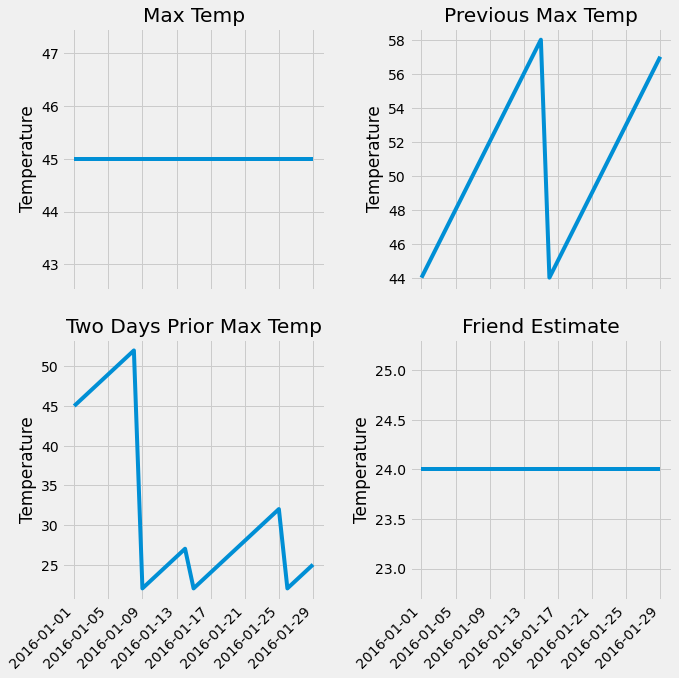

In [32]:
# 准备画图
# 指定默认风格
plt.style.use('fivethirtyeight')

# 设置布局
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# 昨天
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# 前天
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel(''); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# 我的逗比朋友
ax4.plot(dates, features['friend'])
ax4.set_xlabel(''); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [33]:
# 独热编码one hot
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Tues
0,2016,1,1,45,44,44,45,24,1,0,0,0,0
1,2016,1,2,46,45,44,45,24,0,0,1,0,0
2,2016,1,3,47,46,44,45,24,0,0,0,1,0
3,2016,1,4,48,47,44,45,24,0,1,0,0,0
4,2016,1,5,49,48,44,45,24,0,0,0,0,1


In [34]:
# 标签
labels = np.array(features['actual'])
print(labels)

# 在特征中去掉标签
features = features.drop('actual', axis = 1)
print(features)

# 名字单独保存一下，以备后患
feature_list = list(features.columns)
print(features)

# 转换成合适的格式
features = np.array(features)
print(features)
features.shape

[45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45
 45 45 45 45 45]
    year  month  day  temp_2  temp_1  average  friend  week_Fri  week_Mon  \
0   2016      1    1      45      44       44      24         1         0   
1   2016      1    2      46      45       44      24         0         0   
2   2016      1    3      47      46       44      24         0         0   
3   2016      1    4      48      47       44      24         0         1   
4   2016      1    5      49      48       44      24         0         0   
5   2016      1    6      50      49       44      24         1         0   
6   2016      1    7      51      50       44      24         0         0   
7   2016      1    8      52      51       44      24         0         0   
8   2016      1    9      22      52       44      24         0         1   
9   2016      1   10      23      53       44      24         0         0   
10  2016      1   11      24      54       44      24         1

(29, 12)

In [36]:
# 标准化
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

In [37]:
input_features[0]

array([ 0.        ,  0.        , -1.67332005,  1.23378828, -1.61274544,
        0.        ,  0.        ,  1.95789002, -0.51075392, -0.51075392,
       -0.51075392, -0.45643546])

In [38]:
# 基于Keras构建网络模型
# 一些常用参数已经列出,如下所示
# activation 激活函数的选择，一般常用relu
# kernel_initializer, bias_initialzer，权重与偏置参数的初始化方法，有时候不收敛换种初始化就突然好使了。。。玄学
# kernel_regularizer, bias_regularizer 要不哟啊加入正则化
# inputs 输入，可以自己制定，也可以网络自动选择
# units 神经元个数

In [40]:
# 按顺序构建网络模型
model = tf.keras.Sequential()
model.add(layers.Dense(16))
model.add(layers.Dense(32))
model.add(layers.Dense(1))

In [44]:
# compile相当于对网络进行配置，指定好优化器和损失函数等
model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss='mean_squared_error')

In [45]:
model.fit(input_features, labels, validation_split=0.25, epochs=10, batch_size=64)

Epoch 1/10
1/1 [==============================] - 0s 137ms/step - loss: 2021.7037 - val_loss: 2043.7914
Epoch 2/10
1/1 [==============================] - 0s 17ms/step - loss: 1971.0647 - val_loss: 2049.2375
Epoch 3/10
1/1 [==============================] - 0s 17ms/step - loss: 1918.7634 - val_loss: 2055.3999
Epoch 4/10
1/1 [==============================] - 0s 15ms/step - loss: 1858.0472 - val_loss: 2063.1392
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 1781.4772 - val_loss: 2073.0845
Epoch 6/10
1/1 [==============================] - 0s 18ms/step - loss: 1679.4968 - val_loss: 2085.1353
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 1539.6409 - val_loss: 2096.8315
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 1347.8528 - val_loss: 2098.9346
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 1096.1458 - val_loss: 2066.1033
Epoch 10/10
1/1 [==============================] - 0s 17ms/step - loss: 

In [47]:
input_features.shape

(29, 12)

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                208       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [48]:
# 更改后的初始化方法
model = tf.keras.Sequential()
# tf.keras.initializers.random_normal
model.add(layers.Dense(16, kernel_initializer='random_normal'))
model.add(layers.Dense(32, kernel_initializer='random_normal'))
model.add(layers.Dense(1, kernel_initializer='random_normal'))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss='mean_squared_error')
model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100
1/1 [==============================] - 0s 89ms/step - loss: 2025.1815 - val_loss: 2015.9404
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 2016.4772 - val_loss: 2007.3840
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 2007.8064 - val_loss: 1998.8362
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 1999.1487 - val_loss: 1990.2784
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 1990.4825 - val_loss: 1981.6921
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 1981.7863 - val_loss: 1973.0569
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 1973.0361 - val_loss: 1964.3508
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 1964.2068 - val_loss: 1955.5490
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 1955.2699 - val_loss: 1946.6233
Epoch 10/100
1/1 [==============================] - 0s 17ms/step

Epoch 81/100
1/1 [==============================] - 0s 13ms/step - loss: 1.1506 - val_loss: 11.5704
Epoch 82/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0773 - val_loss: 10.8260
Epoch 83/100
1/1 [==============================] - 0s 13ms/step - loss: 1.0085 - val_loss: 10.1286
Epoch 84/100
1/1 [==============================] - 0s 13ms/step - loss: 0.9440 - val_loss: 9.4752
Epoch 85/100
1/1 [==============================] - 0s 14ms/step - loss: 0.8836 - val_loss: 8.8632
Epoch 86/100
1/1 [==============================] - 0s 15ms/step - loss: 0.8269 - val_loss: 8.2900
Epoch 87/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7738 - val_loss: 7.7531
Epoch 88/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7240 - val_loss: 7.2504
Epoch 89/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6774 - val_loss: 6.7797
Epoch 90/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6337 - val_loss: 6.3390
Epoch 9

In [50]:
# 加入正则化惩罚项
model = tf.keras.Sequential()
# tf.keras.initializers.random_normal
model.add(layers.Dense(16, kernel_initializer='random_normal', kernel_regularizer=tf.keras.regularizers.L2(0.03)))
model.add(layers.Dense(32, kernel_initializer='random_normal', kernel_regularizer=tf.keras.regularizers.L2(0.03)))
model.add(layers.Dense(1, kernel_initializer='random_normal', kernel_regularizer=tf.keras.regularizers.L2(0.03)))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss='mean_squared_error')
model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100
1/1 [==============================] - 0s 116ms/step - loss: 2024.8909 - val_loss: 2016.4797
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 2015.7028 - val_loss: 2007.5018
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 2006.5299 - val_loss: 1998.5161
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 1997.3337 - val_loss: 1989.4895
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 1988.0748 - val_loss: 1980.3868
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 1978.7113 - val_loss: 1971.1711
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 1969.1974 - val_loss: 1961.8005
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 1959.4829 - val_loss: 1952.2290
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 1949.5099 - val_loss: 1942.4031
Epoch 10/100
1/1 [==============================] - 0s 15ms/ste

Epoch 81/100
1/1 [==============================] - 0s 13ms/step - loss: 1.6467 - val_loss: 9.8200
Epoch 82/100
1/1 [==============================] - 0s 15ms/step - loss: 1.5879 - val_loss: 9.2238
Epoch 83/100
1/1 [==============================] - 0s 13ms/step - loss: 1.5329 - val_loss: 8.6664
Epoch 84/100
1/1 [==============================] - 0s 14ms/step - loss: 1.4814 - val_loss: 8.1450
Epoch 85/100
1/1 [==============================] - 0s 13ms/step - loss: 1.4333 - val_loss: 7.6576
Epoch 86/100
1/1 [==============================] - 0s 12ms/step - loss: 1.3882 - val_loss: 7.2020
Epoch 87/100
1/1 [==============================] - 0s 13ms/step - loss: 1.3461 - val_loss: 6.7760
Epoch 88/100
1/1 [==============================] - 0s 12ms/step - loss: 1.3067 - val_loss: 6.3779
Epoch 89/100
1/1 [==============================] - 0s 13ms/step - loss: 1.2699 - val_loss: 6.0058
Epoch 90/100
1/1 [==============================] - 0s 13ms/step - loss: 1.2354 - val_loss: 5.6581
Epoch 91/1

In [51]:
# 预测结果
predict = model.predict(input_features)
predict.shape

(29, 1)

In [54]:
# 测试结果进行展示比对，看看差异大不大
# 转换日期格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# 创建一个表格来存日期和其对应的标签数值
true_data = pd.DataFrame(data={'date':dates, 'actual':labels})

# 同理，再创建一个来存日期和其对应的模型预测值
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predict.reshape(-1)})

Text(0.5, 1.0, 'Actual and Predicted Values')

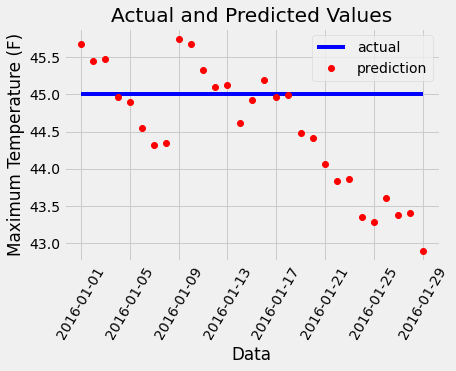

In [58]:
# 真实值
plt.plot(true_data['date'], true_data['actual'], 'b-', label='actual')

# 预测值 
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label='prediction')
plt.xticks(rotation='60')
plt.legend()

# 图名
plt.xlabel('Data'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values')